In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import pearsonr

# import seaborn
import seaborn as sns
%matplotlib inline

# read in file
df = pd.read_csv("All_Movies_Working.csv")

In [56]:
# set data frame as variable "box"
box = df

In [57]:
# calculate box office in terms of millions and put in as a separate column
box["Box Office Mil"] = box["Box Office"] / 1000000
box.head(5)

,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,imdb_score,rotten_source,rotten_score,metacrit_source,metacrit_score,release_month,release_year,Box Office Mil
0,Beowulf,59.0,PG-13,115 min,16 Nov 2007,"Animation, Action, Adventure, Fantasy",82200000.0,6.2,"155,920",Internet Movie Database,6.2,Rotten Tomatoes,7.1,Metacritic,5.9,11,2007,82.200000
1,But I'm a Cheerleader,39.0,R,85 min,11 Aug 2000,"Comedy, Drama, Romance",175182.0,6.6,"23,614",Internet Movie Database,6.6,Rotten Tomatoes,3.9,Metacritic,3.9,8,2000,0.175182
2,Flawless,57.0,PG-13,108 min,28 Mar 2008,"Crime, Drama, Thriller",1146525.0,6.8,"21,901",Internet Movie Database,6.8,Rotten Tomatoes,5.5,Metacritic,5.7,3,2008,1.146525
3,Gloria,83.0,R,110 min,09 May 2013,"Comedy, Drama, Romance",1587655.0,6.8,"7,804",Internet Movie Database,6.8,Rotten Tomatoes,9.9,Metacritic,8.3,5,2013,1.587655
4,Life,54.0,R,104 min,24 Mar 2017,"Horror, Sci-Fi, Thriller",30180466.0,6.6,"185,922",Internet Movie Database,6.6,Rotten Tomatoes,6.8,Metacritic,5.4,3,2017,30.180466


In [58]:
box.tail(5)

,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,imdb_score,rotten_source,rotten_score,metacrit_source,metacrit_score,release_month,release_year,Box Office Mil
2787,Little Miss Sunshine,80.0,R,101 min,18 Aug 2006,"Comedy, Drama",59831476.0,7.8,"413,301",Internet Movie Database,7.8,Rotten Tomatoes,9.1,Metacritic,8.0,8,2006,59.831476
2788,Shaft,50.0,R,99 min,16 Jun 2000,"Action, Crime, Thriller",70334258.0,5.9,"69,457",Internet Movie Database,5.9,Rotten Tomatoes,6.7,Metacritic,5.0,6,2000,70.334258
2789,After the Wedding,78.0,R,120 min,11 May 2007,Drama,1504179.0,7.7,"29,717",Internet Movie Database,7.7,Rotten Tomatoes,8.8,Metacritic,7.8,5,2007,1.504179
2790,Burn,82.0,Not Rated,86 min,22 Apr 2012,Documentary,111256.0,7.5,664,Internet Movie Database,7.5,Rotten Tomatoes,10.0,Metacritic,8.2,4,2012,0.111256
2791,Charlie's Angels,52.0,PG-13,98 min,03 Nov 2000,"Action, Adventure, Comedy, Crime, Thriller",124420707.0,5.5,"164,922",Internet Movie Database,5.5,Rotten Tomatoes,6.8,Metacritic,5.2,11,2000,124.420707


## Top 3 movies based on: 
- smallest spread (in terms of SD) between scores
- box office of at least 100 million dollars
- released since 2017
- mean score of at least 8

In [59]:
# calculate the mean score based on IMDB, Rotten Tomatoes, and Metacritic scores
box["mean_score"] = (box["imdb_score"]+box["rotten_score"]+box['metacrit_score'])/3
box_100 = box.loc[box["Box Office Mil"] >=100]

# https://stackoverflow.com/questions/48366506/calculate-new-column-as-the-mean-of-other-columns-pandas

s = box.loc[: , ("imdb_score","rotten_score",'metacrit_score')]
box['sd_score'] = s.std(axis=1)

print(min(box['sd_score']))
print(max(box['sd_score']))

pd.set_option('display.max_columns', None)
box.head(5)
box_select = box.loc[(box['release_year']>=2017) & (box['Box Office Mil']>=100) & (box['mean_score']>=8)]
box_select.sort_values(by=['sd_score'], ascending=False).head(3)

0.0
3.157530680769389


,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,imdb_score,rotten_source,rotten_score,metacrit_source,metacrit_score,release_month,release_year,Box Office Mil,mean_score,sd_score
2774,Black Panther,88.0,PG-13,134 min,16 Feb 2018,"Action, Adventure, Sci-Fi",501105037.0,7.3,"538,936",Internet Movie Database,7.3,Rotten Tomatoes,9.6,Metacritic,8.8,2,2018,501.105037,8.566667,1.167619
2611,Get Out,84.0,R,104 min,24 Feb 2017,"Horror, Mystery, Thriller",175428355.0,7.7,"416,862",Internet Movie Database,7.7,Rotten Tomatoes,9.8,Metacritic,8.4,2,2017,175.428355,8.633333,1.069268
2657,Wonder Woman,76.0,PG-13,141 min,02 Jun 2017,"Action, Adventure, Fantasy, Sci-Fi, War",412400625.0,7.4,"498,325",Internet Movie Database,7.4,Rotten Tomatoes,9.3,Metacritic,7.6,6,2017,412.400625,8.100000,1.044031


## Top 3 movies based on:
- biggest spread (in terms of SD) between scores
- box office of at least 100 million dollars
- released since 2017
- mean score of less than or equal to 4

In [60]:
box_select = box.loc[(box['release_year']>=2017) & (box['Box Office Mil']>=100) & (box['mean_score']<=4)]
box_select.sort_values(by=['sd_score'], ascending=False).head(3)

,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,imdb_score,rotten_source,rotten_score,metacrit_source,metacrit_score,release_month,release_year,Box Office Mil,mean_score,sd_score
2740,Daddy's Home 2,30.0,PG-13,100 min,10 Nov 2017,Comedy,102934995.0,6.0,"50,842",Internet Movie Database,6.0,Rotten Tomatoes,2.1,Metacritic,3.0,11,2017,102.934995,3.700000,2.042058
2669,Transformers: The Last Knight,27.0,PG-13,154 min,21 Jun 2017,"Action, Adventure, Sci-Fi",130104634.0,5.2,"121,971",Internet Movie Database,5.2,Rotten Tomatoes,1.5,Metacritic,2.7,6,2017,130.104634,3.133333,1.887679
2604,Fifty Shades Darker,33.0,R,118 min,10 Feb 2017,"Drama, Romance",114376885.0,4.6,"83,126",Internet Movie Database,4.6,Rotten Tomatoes,1.1,Metacritic,3.3,2,2017,114.376885,3.000000,1.769181


0    1366
1    1108
2     315
3       3
Name: Title, dtype: int64
2792


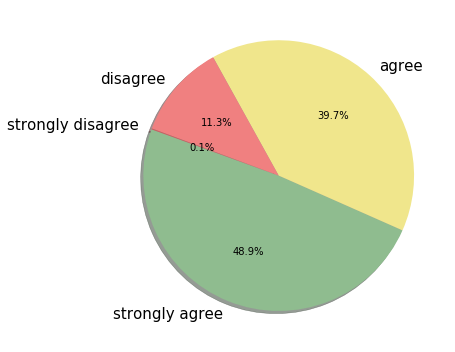

In [61]:
# https://stackoverflow.com/questions/50145702/pandas-cut-doesnt-bin-zero-values
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# 0 to 1], (1 to 2], (2 to 3], (3 and higher]
box['bin'] = pd.cut(box['sd_score'], [-np.inf, 1, 2, 3, np.inf], labels=['0-1', '1-2', '2-3', '3 or higher'])
bins = box.groupby(['bin']).count().reset_index()
print(bins['Title'])
print(sum(bins['Title']))
# Pie chart
# https://pythonspot.com/matplotlib-pie-chart/
labels = 'strongly agree', 'agree', 'disagree', 'strongly disagree'
sizes = bins['Title']
colors = ['darkseagreen', 'khaki', 'lightcoral', 'indianred']
explode = (0, 0, 0, 0)  # explode 1st slice

plt.figure(figsize=(8,5))
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
autopct='%0.1f%%', shadow=True, startangle=160)
# plt.axis('equal')

plt.tight_layout()
plt.savefig("score_piechart_SD.png")
plt.show()

In [62]:
print(box['release_year'].max())
print(box['release_year'].min())

2018
2000


In [63]:
# Setting up data for the scatter plot with three groups
# https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
box_100 = box.loc[box["Box Office Mil"] >=100]
print(len(box_100))
box_sns_scatter = box_100[['Box Office Mil','imdb_rating', 'rotten_score', 'metacrit_score']]
box_sns_scatter = box_sns_scatter.rename(columns = {'imdb_rating':'IMDB', 'rotten_score':'Rotten Tomatoes', 'metacrit_score':'Metacritic'})
box_sns_scatter = box_sns_scatter.melt('Box Office Mil', var_name='Rating guide', value_name='Score')
print(box_sns_scatter.head(5))

421
   Box Office Mil Rating guide  Score
0      124.420707         IMDB    5.5
1      135.606304         IMDB    6.5
2      100.978700         IMDB    6.5
3      259.011600         IMDB    6.1
4      164.454835         IMDB    7.0


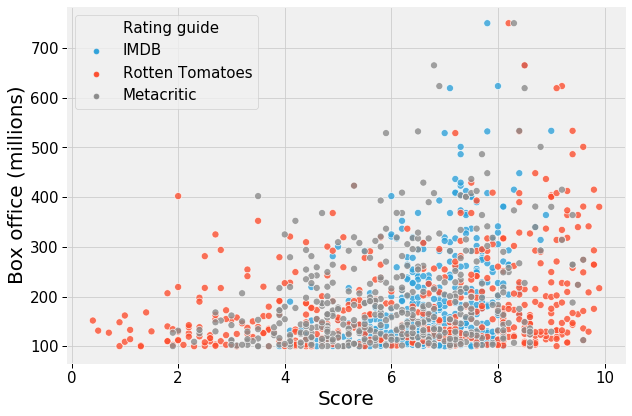

In [64]:
# Setting up data for the scatter plot with three groups
# https://encycolorpedia.com/d9d9db
# https://www.color-hex.com/color-palette/13650
# Seaborn has six variations of its default color palette: deep , muted , pastel , bright , dark , and colorblind .
# https://stackoverflow.com/questions/36220829/fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers/36222162
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20, "legend.fontsize":15, "axes.labelsize":20,
                            'xtick.labelsize': 15, 'ytick.labelsize': 15})  
colors = ["#30a2da", "#fc4f30", "#8b8b8b"]
plt.figure(figsize=(9,6))
sns.scatterplot(x='Score', y='Box Office Mil', hue='Rating guide', data=box_sns_scatter, s=50, alpha=0.8, palette=colors).set(xlabel='Score', ylabel='Box office (millions)') #linewidth=0, 
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.savefig("scatter_at_least_100_mil.png")

In [65]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
def scatter_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, alpha=1, facecolors='none', edgecolors=plotcolor) #color=plotcolor
    plt.plot(x_values,regress_values, '--', linewidth=1, alpha=0.5, color = "black")
    plt.annotate(line_eq,(x_values.min(),regress_values.median()),fontsize=10,color="black")
    plt.annotate(f"R^2 = {round(rvalue**2,3)}",(x_values.min(),0.9*(y_values.max())),fontsize=10,color="black") #format(rvalue, '.5g')
    pearson = pearsonr(x_values, y_values)
    pearson_cc = pearson[0]
    pearson_p = pearson[1]
    rvalue = round(rvalue,2)
    plt.annotate(f"Pearson's r = {format(pearson_cc, '.3g')}",(x_values.min(),0.8*(y_values.max())),fontsize=10,color="black")
    print(f"The r-squared = {rvalue**2}")
    print(f"The Pearson corr coeff = {format(pearson_cc, '.3g')} (p-value = {format(pearson_p, '.3g')})")

### Box Office ($M) vs. Average movie score 
- analysis based on all 2792 movies
- Average movie score = average between IMDB, Rotten Tomatoes, and Metacritic

The r-squared = 0.10890000000000001
The Pearson corr coeff = 0.328 (p-value = 4.97e-12)


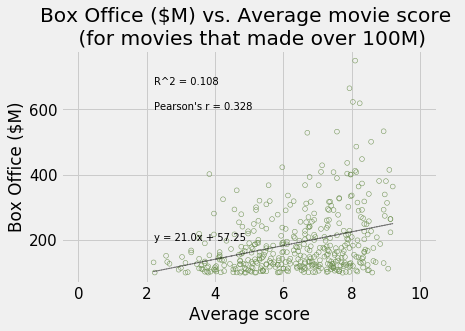

In [66]:
plotcolor = "#6d904f"
plt.xlim([-0.5,10.5])
x_values = box_100["mean_score"]
y_values = box_100["Box Office Mil"] 
plt.xlabel('Average score')
plt.ylabel('Box Office ($M)')
plt.title('Box Office ($M) vs. Average movie score \n (for movies that made over 100M)')
plt.style.use('fivethirtyeight')
scatter_plot(x_values, y_values)

### Box Office ($M) vs. Average movie score 
- include movies that made **at least 100 million dollars** 
- Average movie score = average between IMDB, Rotten Tomatoes, and Metacritic

The r-squared = 0.0484
The Pearson corr coeff = 0.217 (p-value = 3.86e-31)


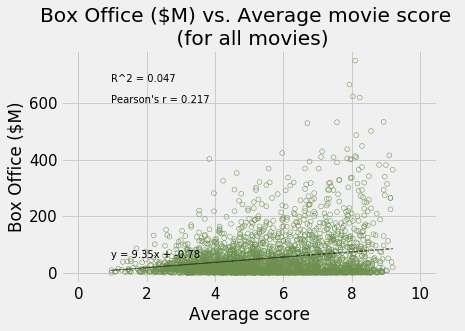

In [67]:
plotcolor = "#6d904f"
plt.xlim([-0.5,10.5])
x_values = box["mean_score"]
y_values = box["Box Office Mil"] 
plt.xlabel('Average score')
plt.ylabel('Box Office ($M)')
plt.title('Box Office ($M) vs. Average movie score \n (for all movies)')
plt.style.use('fivethirtyeight')
scatter_plot(x_values, y_values)

### Box Office ($M) vs. IMDB movie score 
- analysis based on all 2792 movies

The r-squared = 0.0576
The Pearson corr coeff = 0.238 (p-value = 2.88e-37)


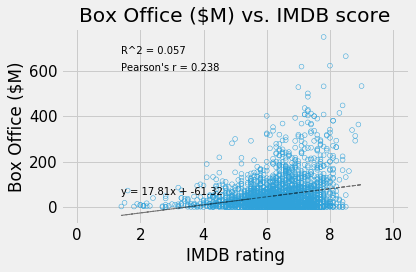

In [68]:
plotcolor = "#30a2da"
plt.xlim([-0.5,10.5])
x_values = box["imdb_rating"]
y_values = box["Box Office Mil"] 
plt.xlabel('IMDB rating')
plt.ylabel('Box Office ($M)')
plt.title('Box Office ($M) vs. IMDB score')
plt.style.use('fivethirtyeight')
scatter_plot(x_values, y_values)
plt.tight_layout()
plt.savefig("scatter_BOvsIMDB.png")

### Box Office ($M) vs. Rotten Tomatoes movie score 
- analysis based on all 2792 movies

The r-squared = 0.04000000000000001
The Pearson corr coeff = 0.205 (p-value = 7.57e-28)


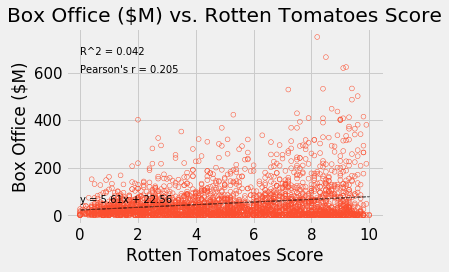

In [69]:
plotcolor = "#fc4f30"
plt.xlim([-0.5,10.5])
x_values = box["rotten_score"]
y_values = box["Box Office Mil"] 
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Box Office ($M)')
plt.title('Box Office ($M) vs. Rotten Tomatoes Score')
plt.style.use('fivethirtyeight')
scatter_plot(x_values, y_values)
plt.tight_layout()
plt.savefig("scatter_BOvRT.png")

### Box Office ($M) vs. Metacritic movie score 
- analysis based on all 2792 movies

The r-squared = 0.0361
The Pearson corr coeff = 0.19 (p-value = 4.54e-24)


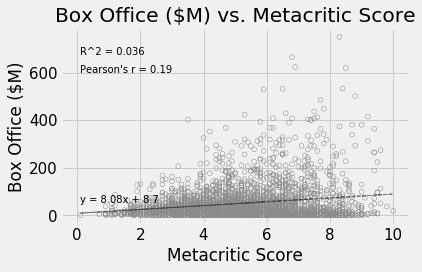

In [70]:
plotcolor = ["#8b8b8b"]
plt.xlim([-0.5,10.5])
x_values = box["metacrit_score"]
y_values = box["Box Office Mil"] 
plt.xlabel('Metacritic Score')
plt.ylabel('Box Office ($M)')
plt.title('Box Office ($M) vs. Metacritic Score')
plt.style.use('fivethirtyeight')
scatter_plot(x_values, y_values)
plt.tight_layout()
plt.savefig("scatter_BOvMC.png")

### Analysis of distribution of movie scores for each guide
#### i.e., IMDB, Rotten Tomatoes, Metacrtiic
- analysis based on all 2792 movies

In [71]:
box_boxplot = box[['imdb_rating', 'rotten_score', 'metacrit_score']]
box_boxplot = box_boxplot.rename(columns = {'imdb_rating':'IMDB', 'rotten_score':'Rotten Tomatoes','metacrit_score':'Metacritic'})
box_boxplot.head(5)

,IMDB,Rotten Tomatoes,Metacritic
0,6.2,7.1,5.9
1,6.6,3.9,3.9
2,6.8,5.5,5.7
3,6.8,9.9,8.3
4,6.6,6.8,5.4


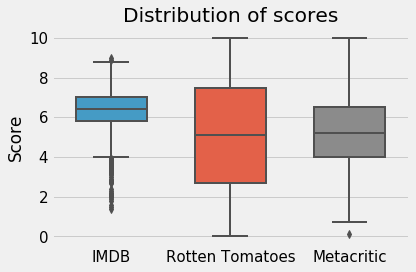

In [72]:
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn?rq=1
# https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/
colors = {"IMDB": "#30a2da", "Rotten Tomatoes": "#fc4f30", "Metacritic":"#8b8b8b"}
sns.boxplot(x ="variable",
            y = "value",
            data =pd.melt(box_boxplot),
            width=0.6,
            saturation = 0.75,
            linewidth = 2,
            palette=colors).set(xlabel='', ylabel='Score')
plt.title('Distribution of scores')
plt.tight_layout()
plt.savefig("boxplot.png")

In [73]:
# Extract individual groups
box_sns_scatter = box_100[['Box Office Mil','imdb_rating', 'rotten_score', 'metacrit_score']]

imdb = box['imdb_rating']
rt = box['rotten_score']
mc = box['metacrit_score']

# Perform the ANOVA
stats.f_oneway(imdb, rt, mc)

F_onewayResult(statistic=317.1492790110948, pvalue=1.7043955939966376e-133)

### t-test to compare the average scores between the different rating guides

In [74]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
print(stats.ttest_ind(imdb, imdb, equal_var=False)) #expect to have no significance; used for testing
print(stats.ttest_ind(imdb, rt, equal_var=False))   #comparison 2
print(stats.ttest_ind(rt, mc, equal_var=False)) #comparison 2
print(stats.ttest_ind(mc, rt, equal_var=False)) # double-check since it should have same result as preivous line
print(stats.ttest_ind(imdb, mc, equal_var=False)) #comparison 3

Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=22.020184245714333, pvalue=8.602047593009143e-101)
Ttest_indResult(statistic=-2.423194588527999, pvalue=0.01542174015293556)
Ttest_indResult(statistic=2.423194588527999, pvalue=0.01542174015293556)
Ttest_indResult(statistic=27.818059930380908, pvalue=4.216084896365368e-157)


In [75]:
# quick check of mean score for two scoring guides
print(box['rotten_score'].mean())
print(box['metacrit_score'].mean())

5.108739255014335
5.257342406876802


In [76]:
# basic stats for IMDB scores
print(box['imdb_rating'].min())
print(np.percentile(box['imdb_rating'], 25))
print(np.percentile(box['imdb_rating'], 50))
print(np.percentile(box['imdb_rating'], 75))
print(box['imdb_rating'].max())

imdb_stats=['IMDB',
            box['imdb_rating'].min(),
            np.percentile(box['imdb_rating'], 25),
            np.percentile(box['imdb_rating'], 50),
            np.percentile(box['imdb_rating'], 75),
            box['imdb_rating'].max()]

1.4
5.8
6.4
7.0
9.0


In [77]:
# basic stats for Rotten Tomatoes
print(box['rotten_score'].min())
print(np.percentile(box['rotten_score'], 25))
print(np.percentile(box['rotten_score'], 50))
print(np.percentile(box['rotten_score'], 75))
print(box['rotten_score'].max())

rt_stats=['Rotten Tomatoes',
          box['rotten_score'].min(),
          np.percentile(box['rotten_score'], 25),
          np.percentile(box['rotten_score'], 50),
          np.percentile(box['rotten_score'], 75),
          box['rotten_score'].max()]

0.0
2.7
5.1
7.5
10.0


In [78]:
# basic stats for Metacritic 
print(box['metacrit_score'].min())
print(np.percentile(box['metacrit_score'], 25))
print(np.percentile(box['metacrit_score'], 50))
print(np.percentile(box['metacrit_score'], 75))
print(box['metacrit_score'].max())

mc_stats=['Metacritic',
          box['metacrit_score'].min(),
          np.percentile(box['metacrit_score'], 25),
          np.percentile(box['metacrit_score'], 50),
          np.percentile(box['metacrit_score'], 75),
          box['metacrit_score'].max()]

0.1
4.0
5.2
6.5
10.0


In [79]:
# put results in dataframe in Jupyter
stats_summary = pd.DataFrame([imdb_stats, rt_stats,  mc_stats], 
                  columns=['guide','min', '25th pctl', 'median', '75th pctl', 'max'])
stats_summary

,guide,min,25th pctl,median,75th pctl,max
0,IMDB,1.4,5.8,6.4,7.0,9.0
1,Rotten Tomatoes,0.0,2.7,5.1,7.5,10.0
2,Metacritic,0.1,4.0,5.2,6.5,10.0
